<a href="https://colab.research.google.com/github/Falconwatch/MarketKing/blob/feature%2Fpredict_high/Low_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В этом ноутбуке развивается предсказатель высшей точки. Его цель - предсказывать, что мы находимя в локлаьном максимуме - цены выше на заданном горизонте в будущем не будет

In [2]:
#!pip install yfinance

In [3]:
from numpy.core.numeric import isclose
import yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import isclose
%matplotlib inline

In [4]:
from methods import load_data

In [7]:
stocks = load_data("sber.me", period_start="2021-01-01")
stocks.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,258.583806,260.400767,256.578546,258.593201,41277720
2021-01-05,258.583802,259.553478,254.450891,257.501129,42179430
2021-01-06,259.779408,259.779408,255.712404,257.887115,36784175
2021-01-08,257.887115,257.887115,257.887115,257.887115,0
2021-01-11,266.294115,275.793213,263.112091,271.650879,108435431


# Размечаем таргет

In [8]:
def mark_target(prices, window=10):
  """Размечаем фактические точки лоу и хай"""
  maxes = stocks["Close"].rolling(window=window, center=True).max()

  targets = np.zeros_like(prices)
  targets[prices==maxes]=1
  return targets

targets = mark_target(stocks["Close"], window=5)
stocks["target"] = targets

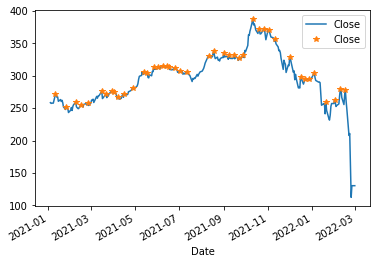

In [9]:
stocks["Close"].plot()
stocks.loc[stocks["target"]==1, "Close"].plot(style="*")
plt.legend()

# Скользящие средние?

## Расчитываем скользящие средние (СС)

In [10]:
def create_ma(prices, ma_steps=[5,10,15,20]):
  """Фозвращает датафрейм с ценой и её скользящими средними заданной ширины"""
  result=pd.DataFrame()
  result["price"] = prices
  for ma_step in ma_steps:
    ma = prices.rolling(ma_step).mean()
    result["ma_{}".format(ma_step)] = ma
  return result

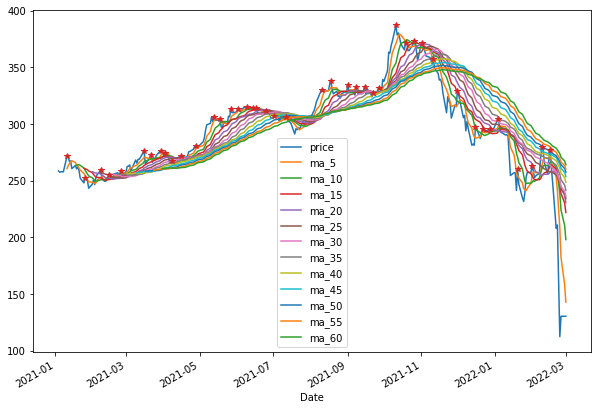

In [11]:
stock_ma = create_ma(stocks["Close"], ma_steps=np.arange(5, 61, 5))
stock_ma.plot(figsize=[10,7])
stocks.loc[stocks["target"]==1, "Close"].plot(style="*")

## Отловим сигналы по СС

In [12]:
def find_sell_signals(short_ma, long_ma):
  """ищем сигнал "продавать" - короткое МА пересекает длинное МА сверху"""
  short_higher = short_ma.shift(-1) > long_ma.shift(-1) #короткое было выше
  short_lower = short_ma.shift(1) < long_ma.shift(1) #короткое стало ниже

  sell_signals = short_higher & short_lower
  return sell_signals

In [13]:
sell_signals = pd.DataFrame()
for i in range(1, len(stock_ma.columns)):
  short_ma_name = stock_ma.columns[i]
  short_ma = stock_ma[short_ma_name]
  for j in range(i, len(stock_ma.columns)):
    long_ma_name = stock_ma.columns[j]
    long_ma = stock_ma[long_ma_name]
    sell_signals_name = "{0}_{1}_sell_signal".format(short_ma_name, long_ma_name)
    sell_signals[sell_signals_name] = find_sell_signals(short_ma, long_ma)

sell_signals= sell_signals.copy().astype(int)

## Выбираем какая пара СС лучше предсказывает пик
пока лучшее, что было придумано - количество пропущенных пиков и рпсстояние до них
TODO: придумать адекватную метрики качества обнаружения пиков

In [14]:
real_peaks = stocks[stocks["target"]==1].index.values

In [15]:
predicted_peaks = sell_signals[sell_signals["ma_5_ma_10_sell_signal"]==1].index.values

In [16]:
for real_peak in real_peaks:
  for predicted_peak in predicted_peaks:
    if 

SyntaxError: ignored

### Отрисовываем

In [17]:
chosen_ma_signals = "ma_5_ma_15_sell_signal"

In [18]:
stocks["MA_signal"] = np.NaN
stocks.loc[sell_signals[chosen_ma_signals]>0, "MA_signal"] = stocks.loc[sell_signals[chosen_ma_signals]>0, "Close"] 

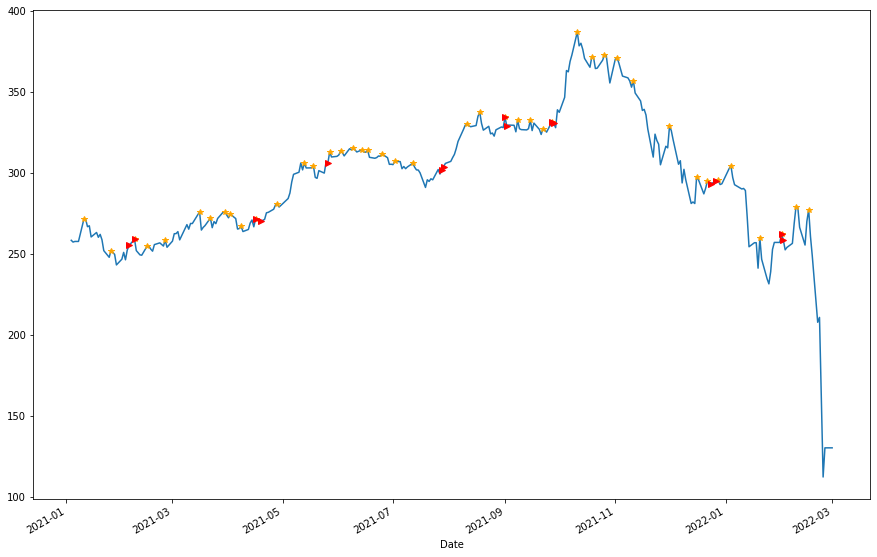

In [19]:
ax = stocks["Close"].plot(figsize=[15,10])
stocks.loc[stocks["target"]==1, "Close"].plot(style="*", color = "orange")
stocks["MA_signal"].plot(style=">", color = "red")

# Изменение цены

In [ ]:
price_diffs = stocks["Close"].diff()

In [ ]:
price_diffs.mean()

In [ ]:
price_diffs.plot()

In [ ]:
price_diffs.plot(kind="hist", bins=20)

In [ ]:
np.zeros()[prices==maxes]

In [ ]:
t[-10:]

In [ ]:
len(t)

In [ ]:
stocks["Close"]